In [82]:
#standart stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load data to pandas frames
appls = pd.read_csv("Wuzzuf_Applications_Sample.csv")
JobPosts = pd.read_csv("Wuzzuf_Job_Posts_Sample.csv")

# First things first

Check info and heads of the frames:

In [83]:
appls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854190 entries, 0 to 1854189
Data columns (total 4 columns):
id          object
user_id     object
job_id      object
app_date    object
dtypes: object(4)
memory usage: 56.6+ MB


In [84]:
JobPosts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21850 entries, 0 to 21849
Data columns (total 20 columns):
id                  21850 non-null object
city                21850 non-null object
job_title           21850 non-null object
job_category1       21850 non-null object
job_category2       21850 non-null object
job_category3       21850 non-null object
job_industry1       21850 non-null object
job_industry2       21850 non-null object
job_industry3       21850 non-null object
salary_minimum      21850 non-null int64
salary_maximum      21850 non-null int64
num_vacancies       21850 non-null int64
career_level        21850 non-null object
experience_years    21850 non-null object
post_date           21850 non-null object
views               21850 non-null int64
job_description     21576 non-null object
job_requirements    19217 non-null object
payment_period      21845 non-null object
currency            21845 non-null object
dtypes: int64(4), object(16)
memory usage: 3.3+ MB


In [85]:
appls.head(10)

,id,user_id,job_id,app_date
0,ba7b8f17,846d013c,516e4ed,2014-01-01 07:27:52
1,30e1ae86,9d5e32c5,516e4ed,2014-01-01 08:20:42
2,d829a6b7,eb26a291,516e4ed,2014-01-01 10:30:37
3,3f985f37,7b5e68a8,516e4ed,2014-01-01 10:55:07
4,27e1695,76fa79b1,516e4ed,2014-01-01 11:00:26
5,93e37a7c,4eca74a6,516e4ed,2014-01-01 12:11:46
6,54431008,d90a6dc0,516e4ed,2014-01-01 13:01:37
7,5a50ec24,5ed37575,516e4ed,2014-01-01 13:11:13
8,9ff7d2aa,5c9bfeaa,516e4ed,2014-01-01 14:15:29
9,b5d1a2a9,ca3f31ac,516e4ed,2014-01-01 15:24:45


We can see the first column can be very usefull for us. We can convert it to date-frame.

In [86]:
#Convert it to datetime
appls['app_date'] = pd.to_datetime(appls['app_date'])
appls.index = appls['app_date']

# now we don't need app_data column
del appls["app_date"]
appls["count"] = 1
appls

,id,user_id,job_id,count
app_date,,,,
2014-01-01 07:27:52,ba7b8f17,846d013c,516e4ed,1
2014-01-01 08:20:42,30e1ae86,9d5e32c5,516e4ed,1
2014-01-01 10:30:37,d829a6b7,eb26a291,516e4ed,1
2014-01-01 10:55:07,3f985f37,7b5e68a8,516e4ed,1
2014-01-01 11:00:26,27e1695,76fa79b1,516e4ed,1
2014-01-01 12:11:46,93e37a7c,4eca74a6,516e4ed,1
2014-01-01 13:01:37,54431008,d90a6dc0,516e4ed,1
2014-01-01 13:11:13,5a50ec24,5ed37575,516e4ed,1
2014-01-01 14:15:29,9ff7d2aa,5c9bfeaa,516e4ed,1


So, now we can do some fancy stauff:

In [87]:
#Check what happen in May 2014?

appls["2014-05"]

,id,user_id,job_id,count
app_date,,,,
2014-05-02 19:32:12,fbbc55c0,cc7cfc70,810fd6f2,1
2014-05-08 14:55:54,d90d6a1e,134fd727,857c4da9,1
2014-05-03 02:41:27,f9f2455d,37aadaeb,2f051522,1
2014-05-03 22:15:14,a59e1d1e,5b542ac5,fe66c38,1
2014-05-03 02:52:04,c3603ce5,37aadaeb,191bdc84,1
2014-05-08 08:50:15,1e1ccf37,407d8d06,41eec3c,1
2014-05-07 01:06:42,aed91e83,95122578,cf423f99,1
2014-05-06 14:30:49,3ca9dbc5,7fd821cb,6e91604d,1
2014-05-08 08:49:28,14df7bbc,407d8d06,d9579e22,1


    Let's visualize some data! 

    The first question how many job application per mounth?

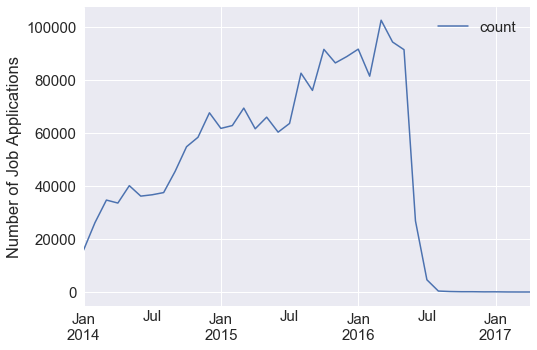

In [88]:
#initital set-up for the seaborn for jupyther notebook
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})


ax = appls.resample('M').sum().plot()
ax.set_xlabel("")
ax.set_ylabel("Number of Job Applications")
#ax.set_title("Frequancy of ")
plt.show()

    Let's make the same for the second df!

In [89]:
new_df = JobPosts

new_df['post_date'] = pd.to_datetime(new_df['post_date'])
new_df.index = new_df['post_date']

#now we don't need post_data column
del new_df["post_date"] 


    Now we have more things to plot! Super!
    
    How many views we have per Month?


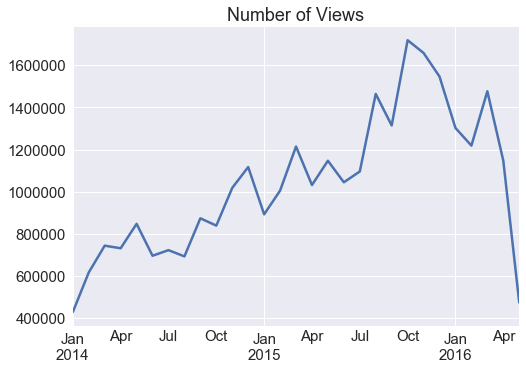

In [77]:
ax = new_df["views"].resample('M').sum().plot()
ax.set_xlabel("")
ax.set_title("Number of Views per Month")
plt.show()

    How many new vacancies per Month?
    
    

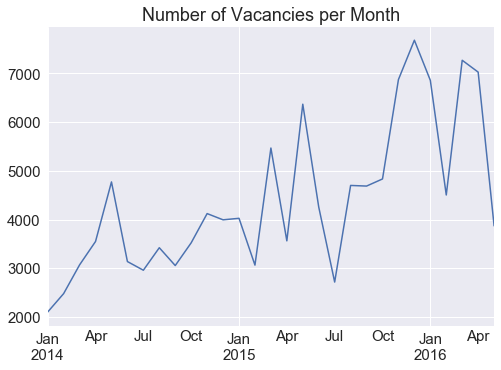

In [90]:
ax = new_df["num_vacancies"].resample('M').sum().plot()
ax.set_xlabel("")
#ax.set_ylabel("Number of Job Applications")
ax.set_title("Number of Vacancies per Month")
plt.show()

    What about minimum and maximum salary?

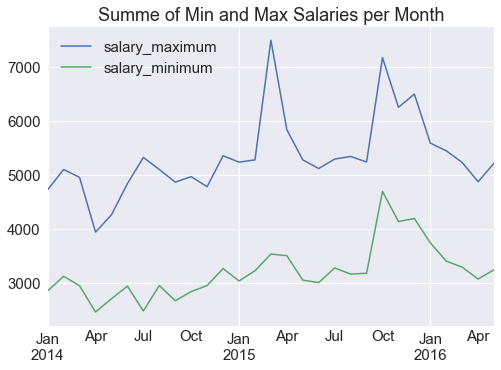

In [91]:
ax = new_df[["salary_maximum","salary_minimum"]].resample('M').mean().plot()
ax.set_xlabel("")
#ax.set_ylabel("Number of Job Applications")
ax.set_title("Summe of Min and Max Salaries per Month")
plt.show()

Ok, but what about the most popular job industry?


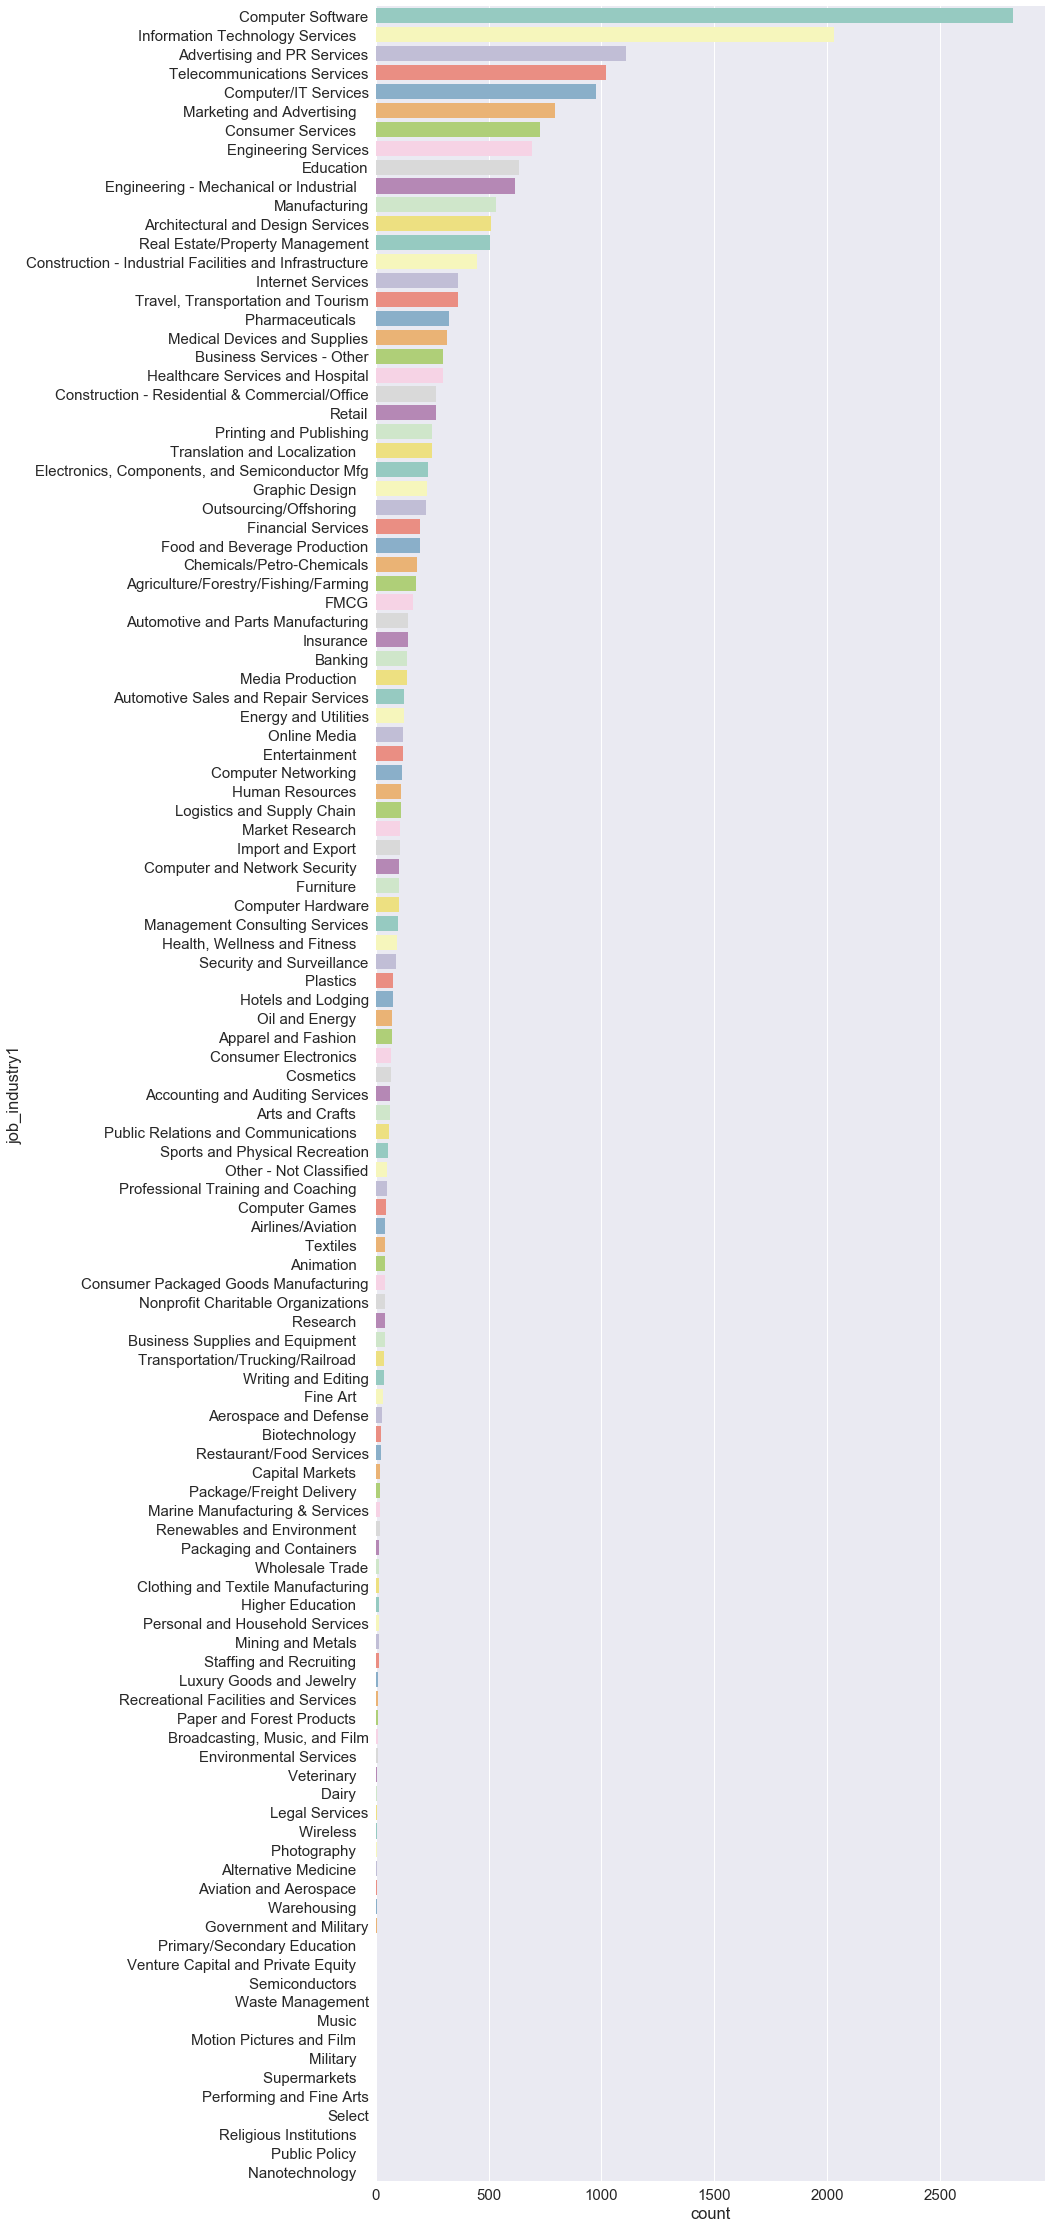

In [92]:

f, ax = plt.subplots(figsize=(12, 40))
#check the colours please!
sns.countplot(y="job_industry1", data=JobPosts,  palette="Set3", 
              order=JobPosts.job_industry1.value_counts().iloc[:].index )

plt.show()

    Cool! What are it the most popular job titles?

In [93]:
#value counts for job_title column
JobPosts["job_title"].value_counts()

Graphic Designer                                              363
Call Center Agent                                             204
Social Media Specialist                                       178
Sales Engineer                                                171
Web Developer                                                 146
Marketing Specialist                                          130
Customer Service Representative                               129
PHP Developer                                                 127
Web Designer                                                  127
Customer Service Agent                                        116
Telesales Agent                                               110
Senior PHP Developer                                           94
Software Developer                                             93
Marketing Manager                                              92
Marketing Executive                                            91
Java Devel

if you want to see it in more fancy way here is a wordcloud for you :)

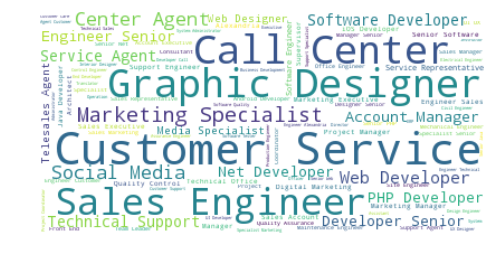

In [94]:
from wordcloud import WordCloud, STOPWORDS
words = ' '.join(JobPosts['job_title'])


# Generate a word cloud image
wordcloud = WordCloud().generate(words)


# lower max_font_size
wordcloud = WordCloud(max_font_size=40,background_color="white").generate(words)

plt.figure()

plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")

plt.show()

# TO BE CONTINUED...

A lot of things which I would like to investigate stay tuned.